In [117]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [118]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')

In [119]:
# Clean data

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df['date'] = pd.to_datetime(df['date'])
df.head()



,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [120]:
def draw_line_plot():
    # Draw line plot

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    #ax.set_ylim(20000,180000)
    
    plt.plot(df['date'], df['value'], color = 'red')
    

    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")

   
    
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


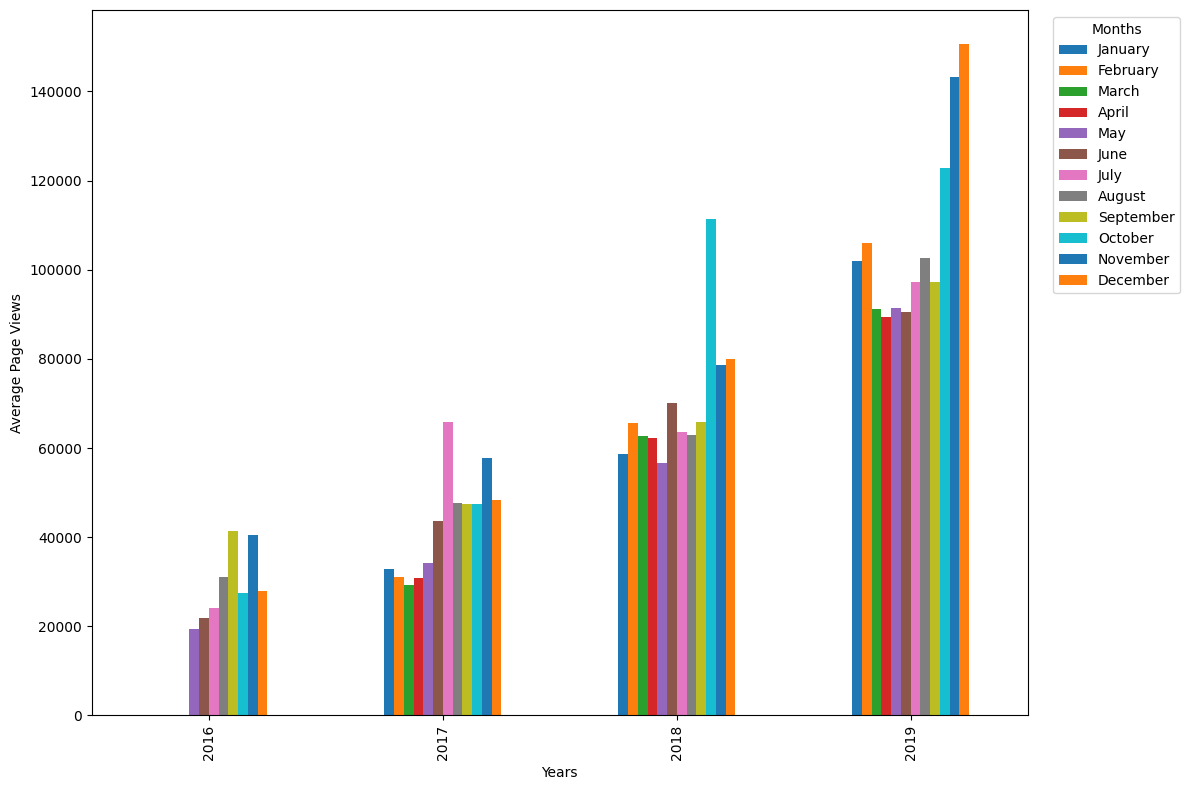

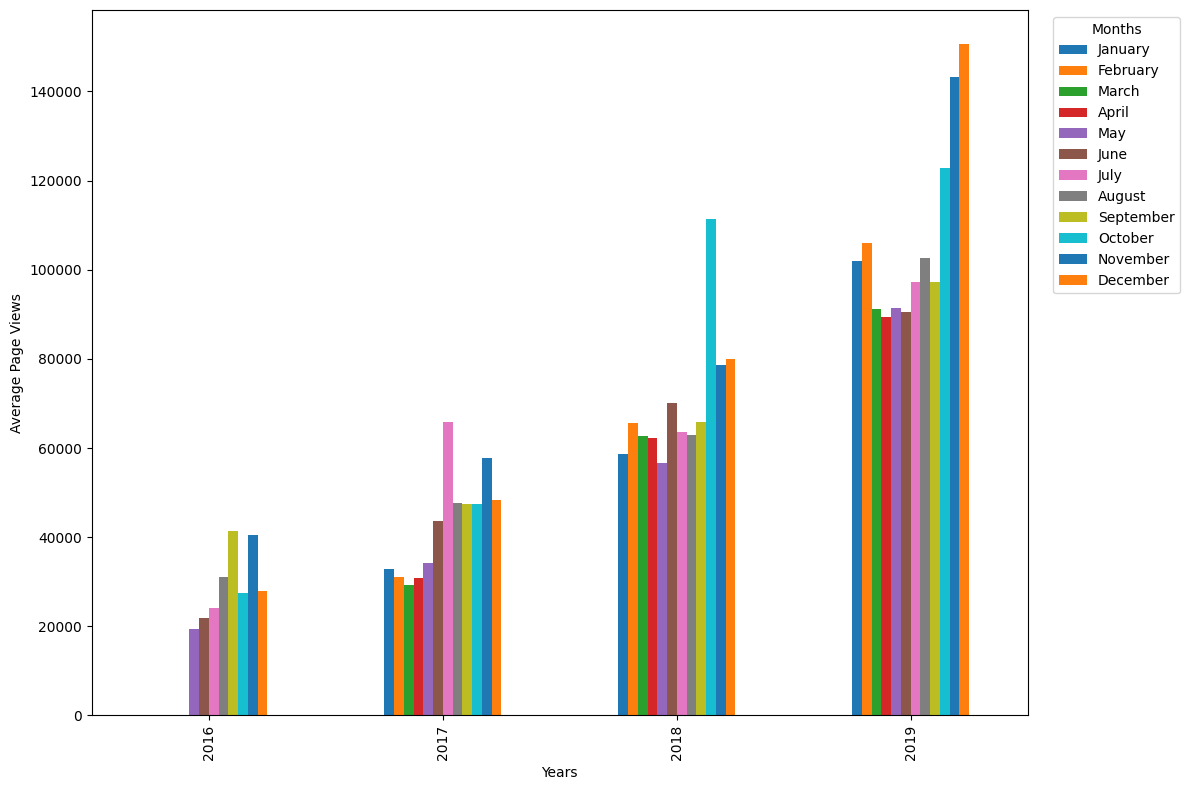

In [121]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot

    df_bar = df.copy()

    df_bar['date']  = pd.to_datetime(df_bar['date'])
    df_bar['year']  = df_bar['date'].dt.year
    df_bar['month'] = df_bar['date'].dt.month_name()

  
    month_order = ['January','February','March','April','May','June',
                'July','August','September','October','November','December']

    pivot = (df_bar.groupby(['year', 'month'])['value']
            .mean()
            .unstack('month')
            .reindex(columns=month_order))  

   
    ax = pivot.plot(kind='bar', figsize=(12, 8))
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    

    fig = ax.figure
    fig.savefig('bar_plot.png')
    
    return fig

draw_bar_plot()

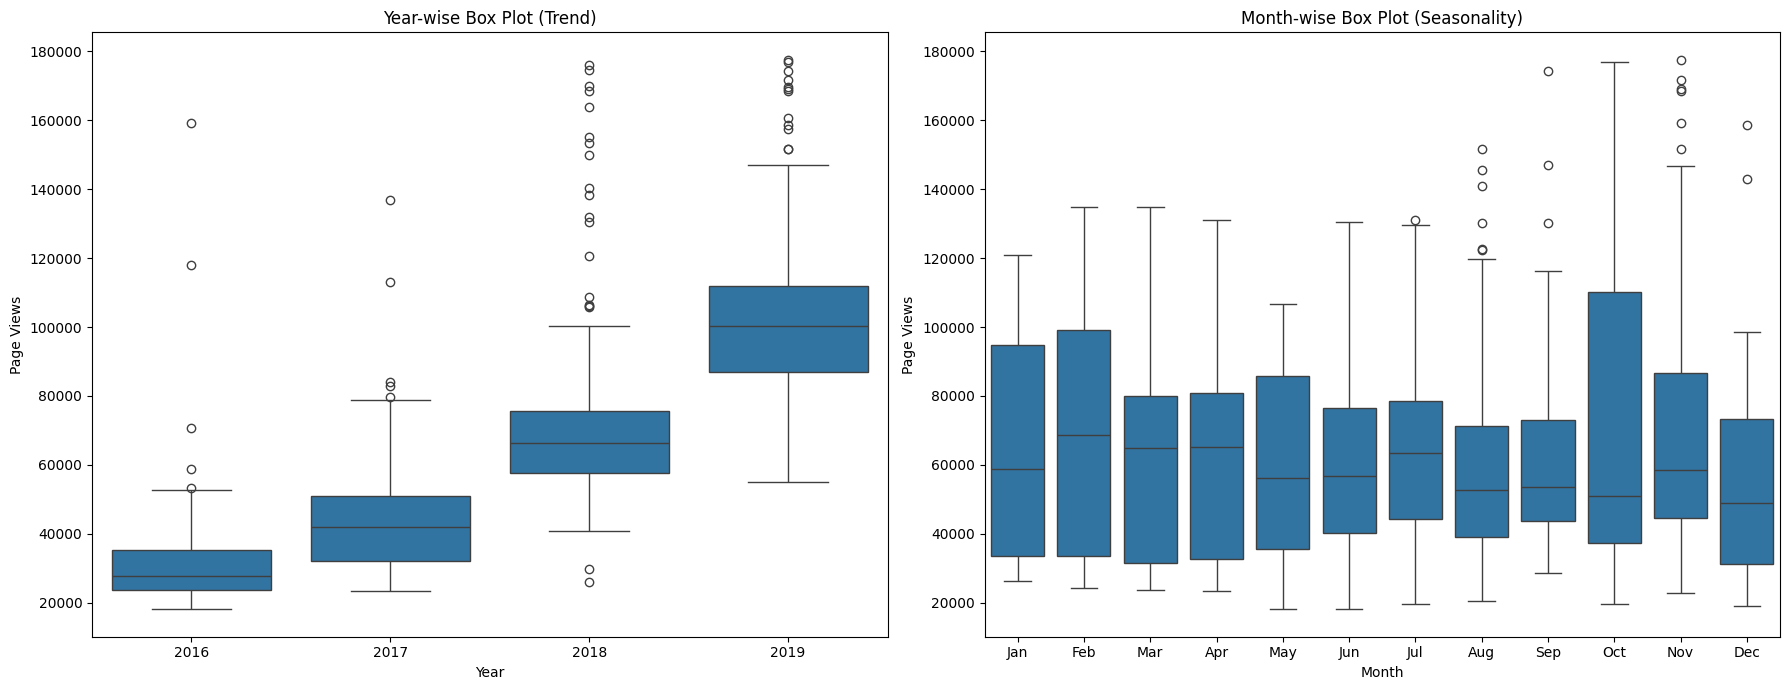

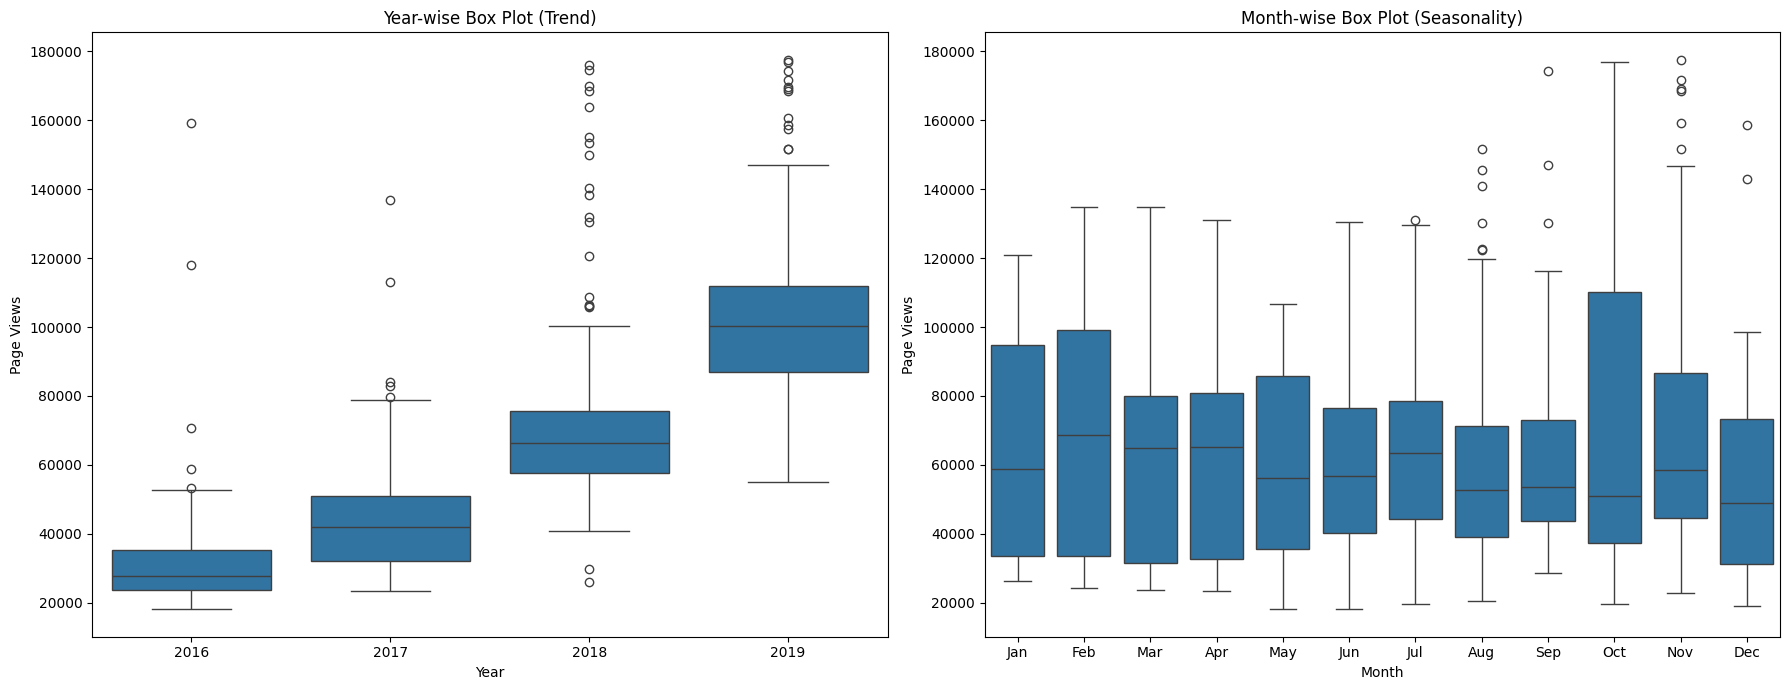

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()              
    df_box['date'] = pd.to_datetime(df_box['date'])  
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month    


    month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))


    sns.boxplot(
        data=df_box,
        x='year', y='value',
        ax=axes[0]
    )
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')


    sns.boxplot(
        data=df_box.sort_values('month_num'),
        x='month', y='value',
        order=month_order,
        ax=axes[1]
    )
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.tight_layout()
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()